# Sieć LSTM do klasyfikacji rodzajów dyfuzji

Celem zadania była klasyfikacja rodzajów dyfuzji różnych cząstek na podstawie ich trajektorii. Do wykonania tego wyzwania zbudowano model sieci z dwoma wartstwami LSTM oraz jedną liniową.
Aby zaprezentować wyniki klasyfikacji na początku zostaną zaimportowane napisane skrypty oraz potrzebne biblioteki

In [ ]:
import numpy as np
import torch
from pytorch_lightning import Trainer, loggers
import pandas as pd
import lstmmodel
import dataset
import visualization

Poniżej podano stałe oraz hiperparametry użyte do trenowania modelu

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") #Domyślne urządzenie
batch_size = 100
sequence_lenght = 300
epochs = 400
labels_size = 5
num_layers = 2
point_dim = 2
hidden_dim = 8

batch_size - wielkość "kubełka", które trafia do modelu
sequence_lenght - długość trajektorii cząstki
epochs - liczba epok
label_size - długość jednej etykiety
num_layers - liczba warstw LSTM
point_dim - ilość współrzędnych jednego punktu
hidden_dim - wielkość jednej ukrytej warstwy

In [6]:
#Ładowanie danych
train_data = torch.from_numpy(np.load('data/X_train.npy')).to(device).float()
train_labels = torch.from_numpy(np.load('data/y_train.npy')).to(device).int()
val_data = torch.from_numpy(np.load('data/X_val.npy')).to(device).float()
val_labels = torch.from_numpy(np.load('data/y_val.npy')).to(device).int()
test_data = torch.from_numpy(np.load('data/X_test.npy')).to(device).float()

(Wszelkie to(device) oraz float() są po to, aby upewnić się, że wszystko jest we właściwym miejscu i we właściwym formacie.)

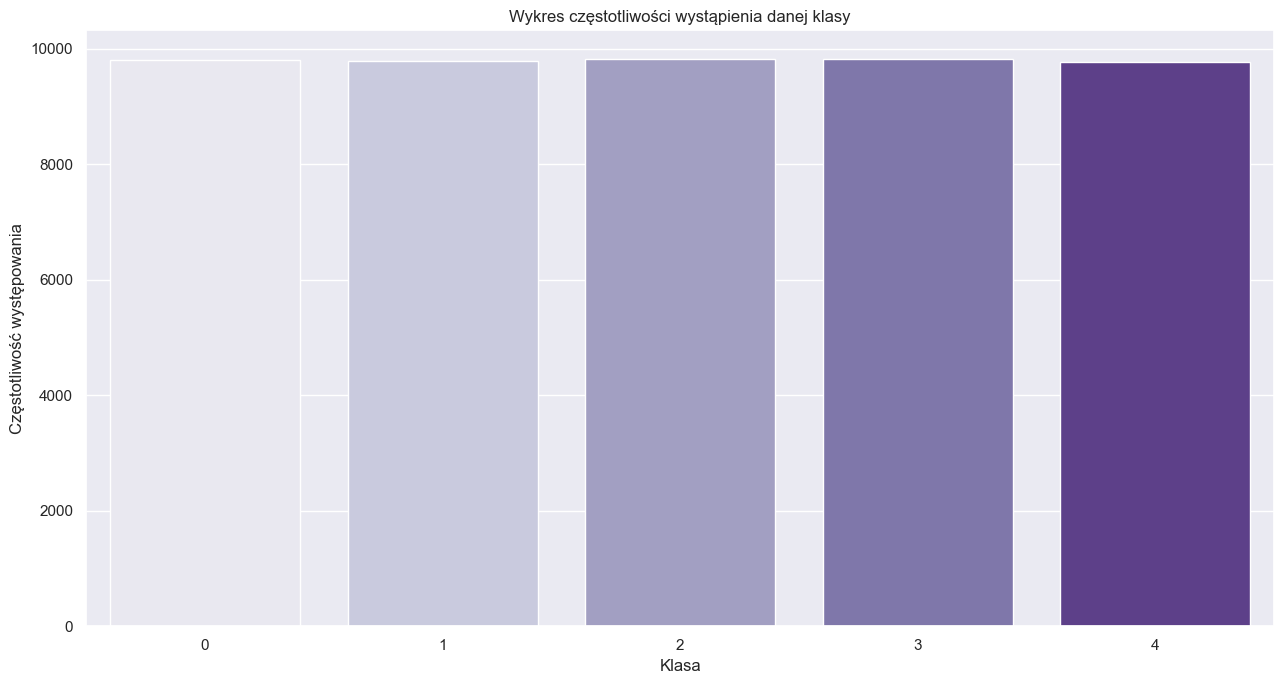

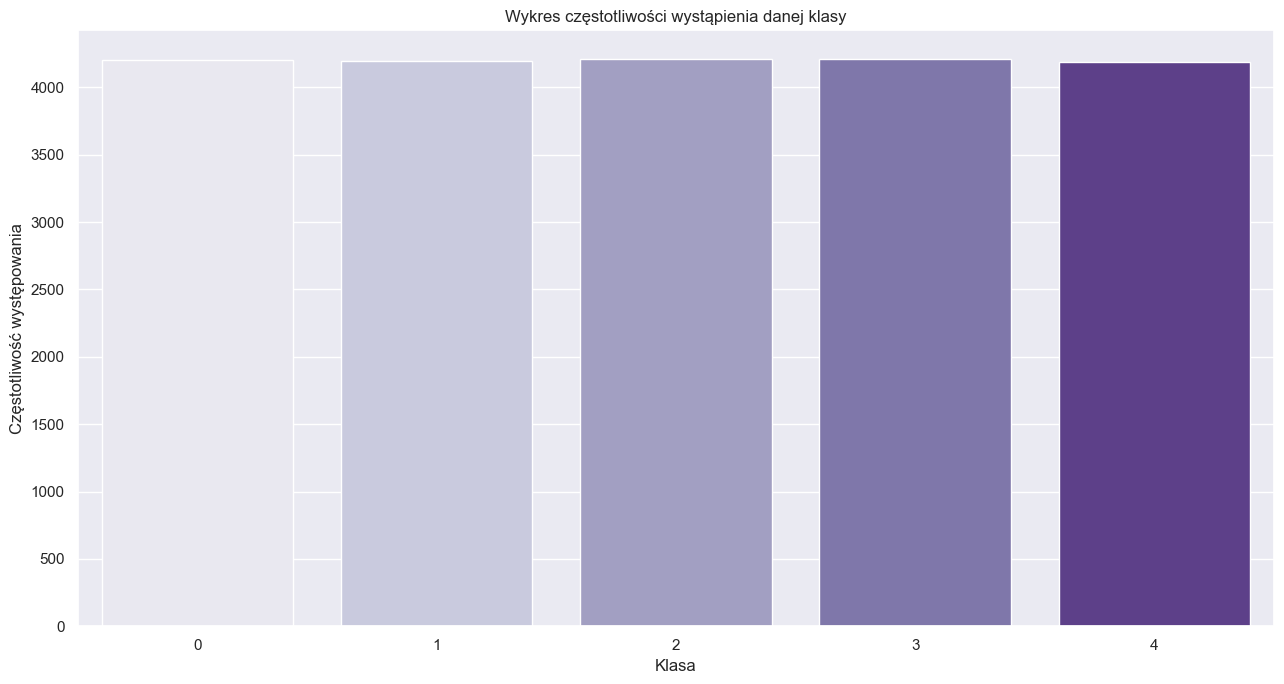

In [7]:
num_train_labels = torch.argmax(train_labels, dim=1).to(device)
visualization.draw_class_occurrence_plot(num_train_labels)
num_val_labels = torch.argmax(val_labels, dim=1).to(device)
visualization.draw_class_occurrence_plot(num_val_labels)

Z powyższych wykresów można zauważyć równomierny rozkład klas zarówno w zbiorze treningowym jak i walidacyjnym.

Model był już trenowany, zatem w celu samego przedstawienia wyniku zostanie on tutaj załadowany

In [8]:
model = lstmmodel.LSTMModel(point_dim, hidden_dim, sequence_lenght, labels_size, num_layers).to(device)
checkpoint = torch.load('model\epoch=399-step=196000.ckpt', map_location=device)
model.load_state_dict(checkpoint["state_dict"])

<All keys matched successfully>

# Walidacja wyników

Dokładnosć dla klasy 0 wynosi 25.089263916015625%
Dokładnosć dla klasy 1 wynosi 80.61054348945618%
Dokładnosć dla klasy 2 wynosi 45.797720551490784%
Dokładnosć dla klasy 3 wynosi 86.69201731681824%
Dokładnosć dla klasy 4 wynosi 76.20640397071838%


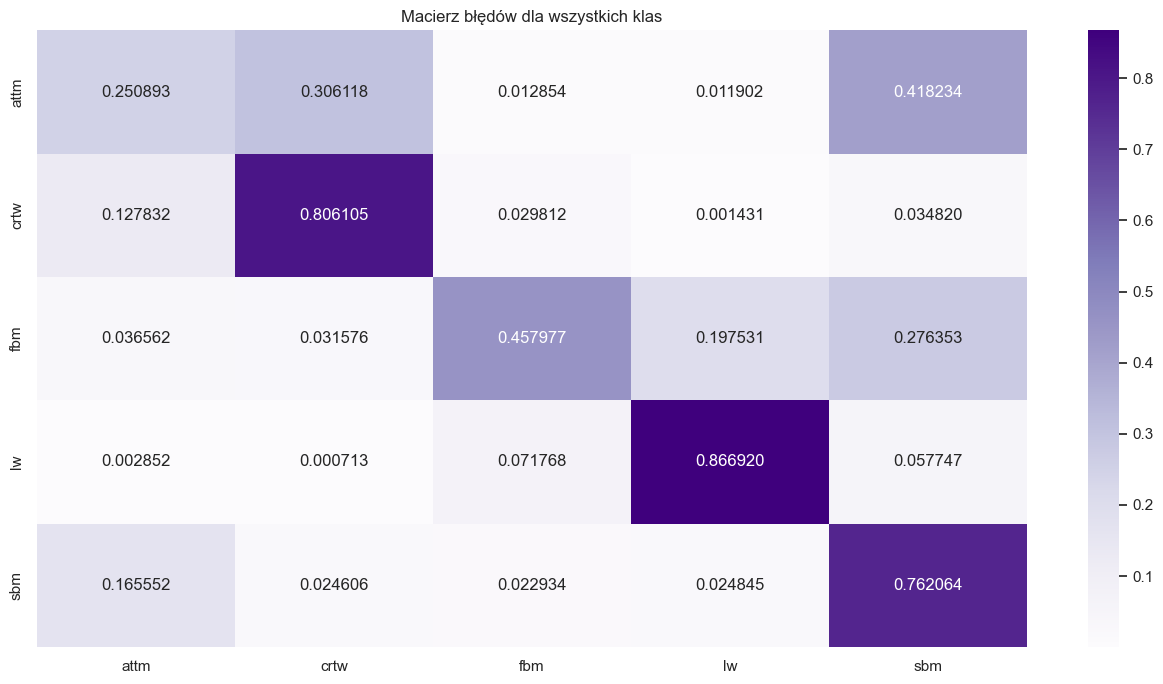

In [9]:
# WALIDACJA
model.to(device)
model.eval()
with torch.no_grad():
    outputs,_ =model(val_data.to(device))
    _, validations = torch.max(outputs.to(device), 1)
visualization.confusion_matrix_and_accuracy(validations, num_val_labels, 5, device)

Na podstawie narysowanej macierzy błędów można wywnioskować, że model najlepiej przewiduje wyniki dla klasy 1,3 i 4. Bardzo słabo radzi sobie z przewidywaniem wyników dla klasy 0, często mylonej z klasą 4.

# Prezentacja metryk

W ramach ewaluacji przedstawione zostaną wykresy funkcji strat oraz dokładności.

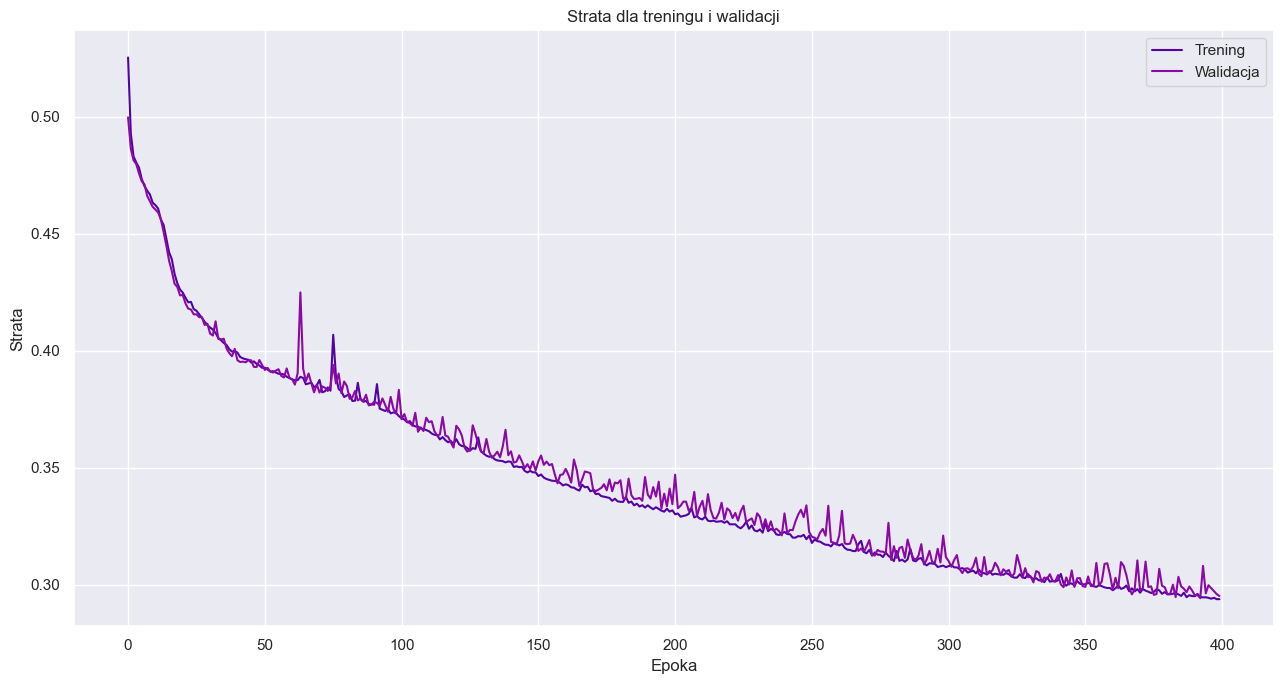

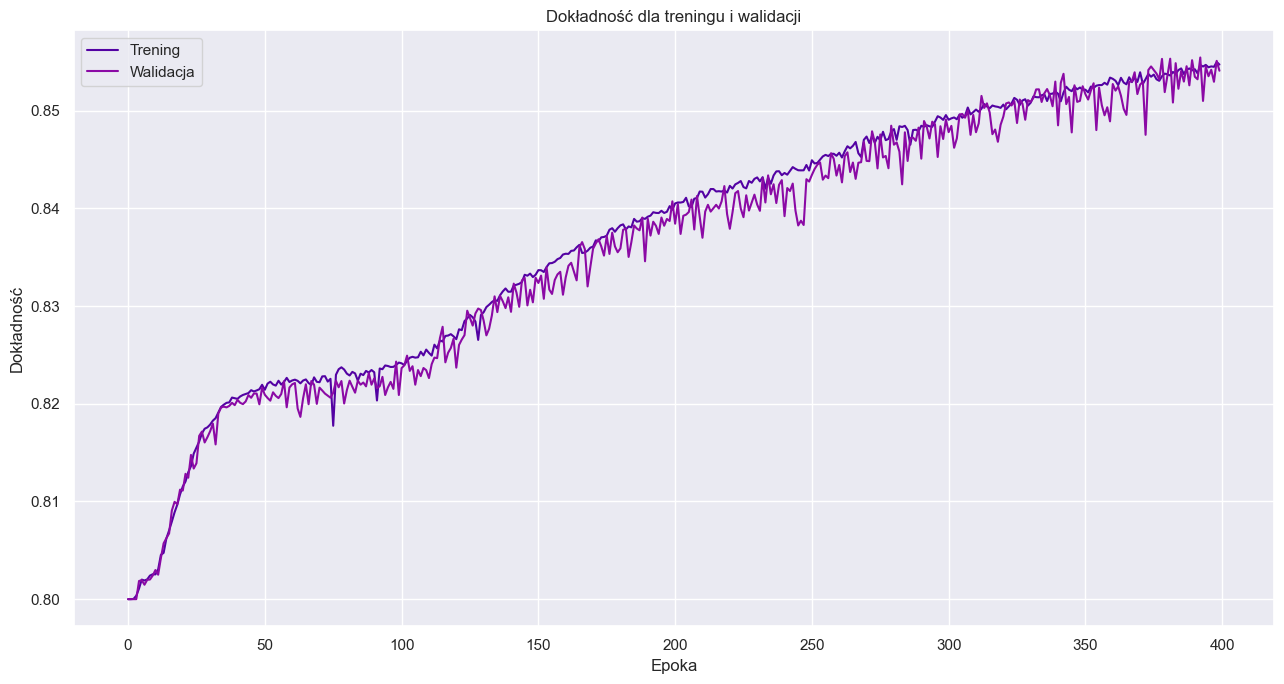

In [11]:
stats = pd.read_csv('model/metrics.csv')
visualization.plot_acc_and_loss(stats)

# Wnioski i podsumowanie

Zbudowany model osiągnął dokładność ok.85% . Aby polepszyć wyniki przewidywań, można dodać dodatkową warstwę LSTM do modelu lub lekko zwiększyć współczynnik szybkości uczenia (np. do 0,002). Na tym można zakończyć dalsze rozważania.

Autor notatnika: Katarzyna Matuszek